In [1]:
from datetime import datetime,timedelta
import time
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import MetaTrader5 as mt5
import yfinance as yf
import mplfinance as mpf
from plotly.subplots import make_subplots

In [2]:
mt5.initialize()

True

In [122]:
#settings
symbol='EURUSD'
timeframe=mt5.TIMEFRAME_D1
start_pos=0
num_bars=1000

fsma_period=10
ssma_period=20

In [130]:
#extracting historical data
bars= mt5.copy_rates_from_pos(symbol,timeframe,start_pos,num_bars)
df=pd.DataFrame(bars)[['time','open','low','close']]
df['time']=pd.to_datetime(df['time'], unit='s')

# using SMA and RSI indicators
df['slow_sma']=ta.SMA(df['close'],ssma_period)
df['fast_sma']=ta.SMA(df['close'],fsma_period)
df['prev_fast_sma']=df['fast_sma'].shift(1)

df['RSI']= ta.RSI(df['close'],fsma_period)
df.dropna(inplace=True)
df.iloc[-1,:]

time             2022-03-16 00:00:00
open                         1.09529
low                           1.0947
close                        1.10046
slow_sma                     1.11078
fast_sma                     1.09614
prev_fast_sma                1.09728
RSI                          43.8315
Name: 999, dtype: object

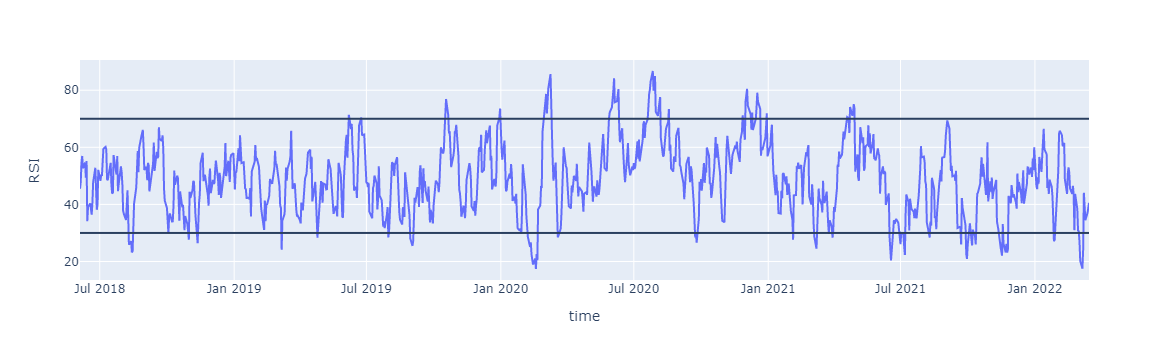

In [124]:
fig_rsi=px.line(df,x='time',y='RSI')
fig_rsi.add_hline(30)
fig_rsi.add_hline(70)
fig_rsi

In [125]:
# finding crossovers
# if pre_fast_sma value is lower than the slow sma and fast_sma greater than slow_sma its a crossover


def crossover_signal(fast_sma,prev_fast_sma,slow_sma, rsi):
    if rsi>30 and rsi<70:
        if fast_sma> slow_sma and prev_fast_sma<slow_sma:
            return 'bullish crossover'
        elif fast_sma< slow_sma and prev_fast_sma>slow_sma:
            return 'bearish crossover'
    
    
    return None

df['sma_crossover']=df.apply(lambda x: crossover_signal(x['fast_sma'],x['prev_fast_sma'],x['slow_sma'], x['RSI']),axis=1)

signal=df[df['sma_crossover'].isnull()== False].copy()
signal



,time,open,low,close,slow_sma,fast_sma,prev_fast_sma,RSI,sma_crossover
25,2018-06-12,1.17825,1.17327,1.17442,1.172263,1.172828,1.170771,49.360162,bullish crossover
32,2018-06-21,1.15719,1.15077,1.16023,1.167275,1.166427,1.168378,40.664144,bearish crossover
56,2018-07-25,1.16825,1.16637,1.17277,1.168073,1.168246,1.167690,56.955853,bullish crossover
63,2018-08-03,1.15830,1.15595,1.15721,1.167483,1.166081,1.167614,36.669098,bearish crossover
80,2018-08-28,1.16764,1.16617,1.16927,1.152959,1.153390,1.149889,65.073847,bullish crossover
...,...,...,...,...,...,...,...,...,...
906,2021-11-05,1.15503,1.15125,1.15662,1.159963,1.159648,1.160415,44.030895,bearish crossover
930,2021-12-09,1.13421,1.12776,1.12917,1.130194,1.130552,1.129687,44.303418,bullish crossover
943,2021-12-28,1.13251,1.12888,1.13076,1.129909,1.130158,1.129659,49.611642,bullish crossover
975,2022-02-10,1.14210,1.13742,1.14269,1.133476,1.135496,1.132665,61.526454,bullish crossover


In [126]:
# visualize close price
fig=px.line(df,x='time', y=['close','slow_sma','fast_sma'])

for i, row in signal.iterrows():
    if row['sma_crossover']=='bullish crossover':
        fig.add_vline(x=row['time'],line_color='green')
    elif row['sma_crossover']=='bearish crossover':
        fig.add_vline(x=row['time'],line_color='red')
             

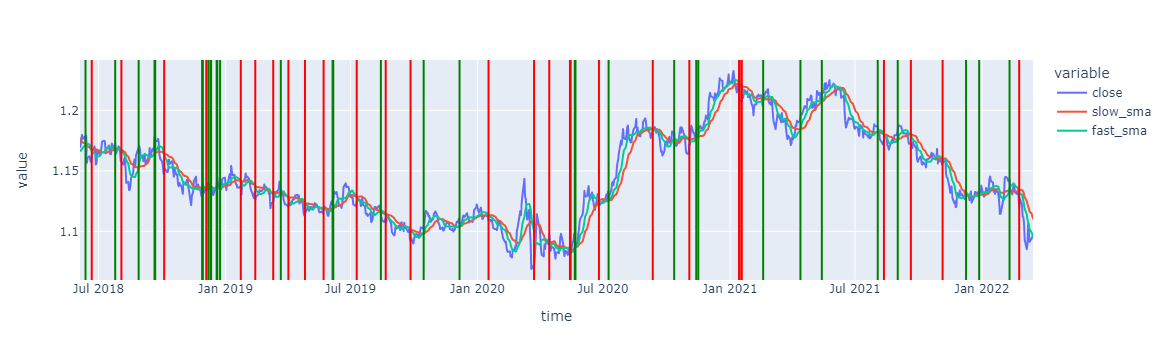

In [127]:
fig

### RSI indicator


In [128]:

df

,time,open,low,close,slow_sma,fast_sma,prev_fast_sma,RSI,sma_crossover
19,2018-06-04,1.17264,1.16764,1.16973,1.176035,1.167179,1.168108,45.466879,None
20,2018-06-05,1.16961,1.16517,1.17160,1.175301,1.166568,1.167179,47.792139,None
21,2018-06-06,1.17120,1.17113,1.17726,1.174915,1.167333,1.166568,54.339737,None
22,2018-06-07,1.17736,1.17721,1.17974,1.174331,1.168124,1.167333,56.967210,None
23,2018-06-08,1.17965,1.17266,1.17655,1.173440,1.169178,1.168124,52.638119,None
...,...,...,...,...,...,...,...,...,...
995,2022-03-10,1.10710,1.09753,1.09877,1.118637,1.105350,1.107398,38.570330,None
996,2022-03-11,1.09844,1.09012,1.09130,1.116473,1.101768,1.105350,34.462624,None
997,2022-03-14,1.09202,1.08998,1.09390,1.114641,1.098974,1.101768,37.055112,None
998,2022-03-15,1.09402,1.09253,1.09527,1.112622,1.097278,1.098974,38.479897,None


In [131]:
df.iloc[-1,:]

time             2022-03-16 00:00:00
open                         1.09529
low                           1.0947
close                        1.10046
slow_sma                     1.11078
fast_sma                     1.09614
prev_fast_sma                1.09728
RSI                          43.8315
Name: 999, dtype: object

In [134]:
time,_,low,close,slow_sma,fast_sma,prev_fast_sma,RSI=df.iloc[-1,:]
RSI

43.83152365663122

In [143]:
test=df["RSI"][-3:].to_numpy()

In [145]:
if (test<30).all():
    print('ok')

In [147]:
(test<45).all()

True